# Salary Predictions Based on Job Descriptions

###### Author: Suyog Ghungrad 
###### Email : suyogghungrad@gmail.com

After graduation, my next step was to find a full-time job. I wanted good salary. Similar, is the case of people who are looking for jobs. The companies want an employee who would be able to work on low salary. Due to this mismatch, there is unhappiness between either of them or both. Employees leave the company after a certain time and companies have to hire new employees and train them or companies are currently over paying them (huge payroll expenses) which could be saved. 
The purpose of this project is to help companies solve this problem by accurately predicting salaries to recruit and retain top talent. This model will serve like a guide for them. For model to predict salary, ceratin details of candidates like years of experience, job type, college degree, college major, industry and miles from metropolis. 

# 1. Load Libraries &  Dataset

#### Import neccessary libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

#### Load the data into pandas dataframe

There are three .csv files - 
Train salaries contains details of jobId their respective salaries, Train features contains features of employee for their jobID, Test features contains features of employee whose salary is to be predicted.

In [2]:
#load the data into a Pandas dataframe
train_salaries = pd.read_csv('data/train_salaries.csv') 
train_features = pd.read_csv('data/train_features.csv')
test_features = pd.read_csv('data/test_features.csv')

#### Examine the data 

In [3]:
# Verify if the data is loaded properly
train_salaries.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [4]:
# Verify if the data is loaded properly
train_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [5]:
# Verify if the data is loaded properly
test_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


## Examine Data

#### Check the length & dtypes of data set

Train salaries contain jobId and salaries

In [6]:
train_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


Train features contain jobId, companyId, jobType, degree, major, industry, yearExperience and milesfrommetropolis

In [7]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


Test features contain jobId, companyId, jobType, degree, major, industry, yearExperience and milesfrommetropolis

In [8]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


Numerical columns: yearsExperience, milesFromMetropolis, Salary
& Categorical columns: jobId, companyId, degree, major, industry

#### Check for any duplicate values

In [9]:
train_features.duplicated().sum()

0

In [10]:
train_salaries.duplicated().sum()

0

In [11]:
test_features.duplicated().sum()

0

There are no duplicate values in the data set. 

#### Check if training and testing dataset have same columns. If not, then have to add or subtract columns from training set

In [12]:
train_features.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [13]:
test_features.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

Training and Tesing features have same columns. So, no changes in columns is needed.

# 2. Exploratory Data Analysis (EDA)

Summarize training and testing data set. For categorical features get number of unique values, top values and frequency of those top values and for numerical features get mean, std, min and max

In [14]:
train_features.describe(include=[np.object])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684572411,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


Degree has 5 unique values, Major has 9 unique values and Industry has 7 unique values.

In [15]:
train_features.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [16]:
test_features.describe(include=[np.object])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685862240,COMP13,VICE_PRESIDENT,HIGH_SCHOOL,NONE,SERVICE
freq,1,16130,125434,238255,534068,143161


In [17]:
test_features.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


Merge salary and features dataset into one training set on jobId.

In [18]:
train_dt = pd.merge(train_features,train_salaries,on='jobId')

In [19]:
# Verify if merging was properly done
train_dt.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [20]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


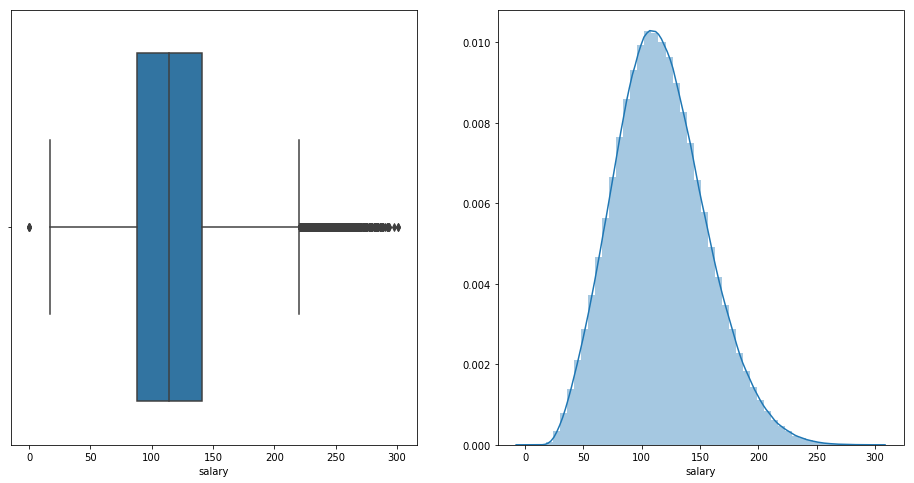

In [21]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.boxplot(train_dt.salary)
plt.subplot(1,2,2)
sns.distplot(train_dt.salary)
plt.show()

There are some outliers and they needed to be checked. As salary is zero for some jobs and it also reaches upto 300K. This seems to be little suspicious about data.

In [22]:
zero_salary = train_dt['salary']<= 0
train_dt[zero_salary]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


This makes no sense.  A vice president, manager, CTO have zero salaries. Also, a junior with doctoral degree and 11 years of experience in auto industry have zero salary. These values are erroneous & misleading and therefore should be removed.

In [23]:
train_dt[zero_salary].index.tolist()

[30559, 495984, 652076, 816129, 828156]

In [24]:
high_salary = train_dt['salary']>= 290
train_dt[high_salary]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
47203,JOB1362684454890,COMP18,CEO,BACHELORS,BUSINESS,FINANCE,22,18,292
293221,JOB1362684700908,COMP44,CEO,DOCTORAL,ENGINEERING,OIL,19,18,294
377196,JOB1362684784883,COMP5,CEO,DOCTORAL,ENGINEERING,WEB,20,8,290
400611,JOB1362684808298,COMP45,CFO,DOCTORAL,ENGINEERING,OIL,23,3,301
503962,JOB1362684911649,COMP3,CEO,DOCTORAL,PHYSICS,OIL,24,1,293
572777,JOB1362684980464,COMP60,CEO,MASTERS,ENGINEERING,OIL,22,1,298
685562,JOB1362685093249,COMP47,CTO,MASTERS,ENGINEERING,OIL,24,0,301
884902,JOB1362685292589,COMP1,CTO,MASTERS,BUSINESS,FINANCE,24,2,292
905713,JOB1362685313400,COMP35,CEO,DOCTORAL,BUSINESS,FINANCE,16,17,293
911747,JOB1362685319434,COMP3,CEO,BACHELORS,BUSINESS,FINANCE,24,28,294


The higher salaries is justified by their jobtype, years of experience and industry. These values should remain in the data set.

In [25]:
# Removing wrong entries of zero salaries
train_dt = train_dt.drop(train_dt[zero_salary].index.tolist())

In [26]:
# Verfying the shape and number of dataframe
train_dt.shape

(999995, 9)

In [27]:
train_dt.tail()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149
999999,JOB1362685407686,COMP59,JUNIOR,BACHELORS,NONE,EDUCATION,20,11,88


This shows us that index number need to be reset.

In [28]:
# Reset index numbers
train_dt.reset_index(drop=True,inplace=True)

train_dt.tail()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
999990,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999991,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999992,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999993,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149
999994,JOB1362685407686,COMP59,JUNIOR,BACHELORS,NONE,EDUCATION,20,11,88


In [29]:
stats = train_dt.salary.describe()
print(stats)
IQR = stats['75%'] - stats['25%']
upper = stats['75%'] + 1.5*IQR
lower = stats['25%'] - 1.5*IQR
print('The upper and lower bounds for data frame :' +str(upper) +' and ' +str(lower))

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64
The upper and lower bounds for data frame :220.5 and 8.5


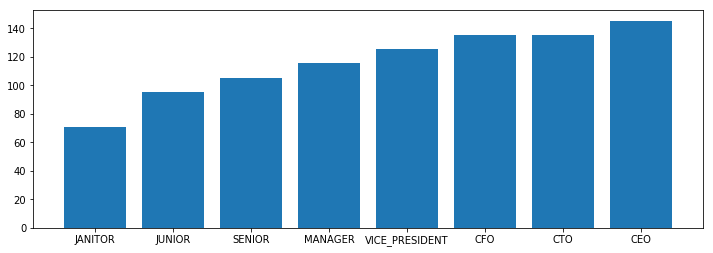

In [30]:
# Visualize features
x = train_dt[['salary','jobType']].groupby(['jobType']).mean().sort_values('salary')
y = x.index
plt.figure(figsize=(12,4))
plt.bar(y,x['salary'])
plt.show()

This shows that CEO position is the most paid position following CTO,CFO and vice_president.

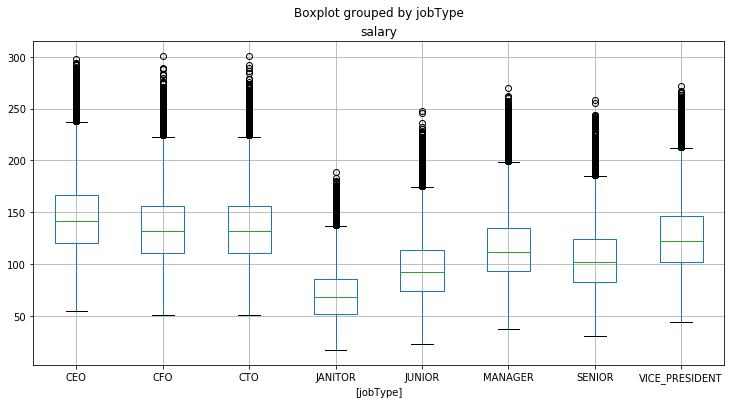

In [31]:
train_dt.boxplot(column=['salary'],by=['jobType'],figsize = (12,6))
plt.show()

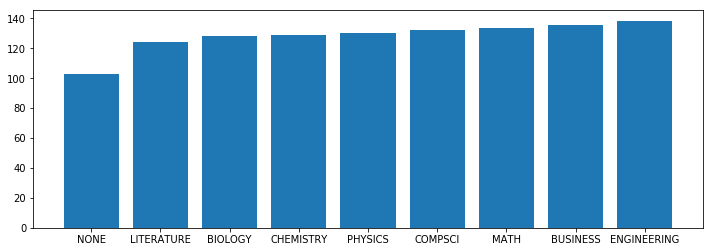

In [32]:
# Visualize features
x = train_dt[['salary','major']].groupby(['major']).mean().sort_values('salary')
y = x.index
plt.figure(figsize=(12,4))
plt.bar(y,x['salary'])
plt.show()

Engineering majors have the highest average salary followed by business and math majors

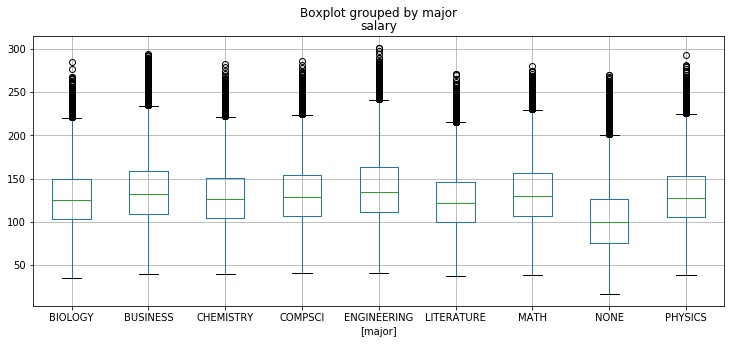

In [33]:
train_dt.boxplot(column=['salary'],by=['major'],figsize = (12,5))
plt.show()

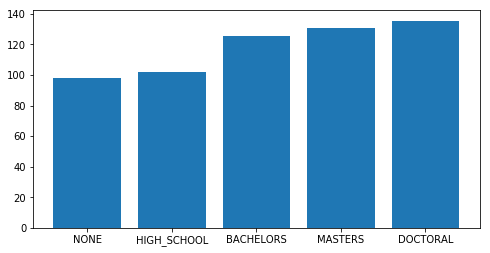

In [34]:
# Visualize features
x = train_dt[['salary','degree']].groupby(['degree']).mean().sort_values('salary')
y = x.index
plt.figure(figsize=(8,4))
plt.bar(y,x['salary'])
plt.show()

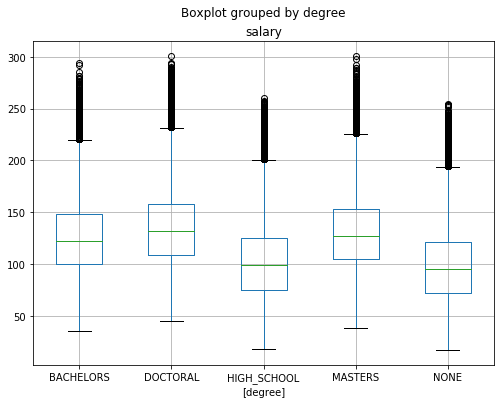

In [35]:
train_dt.boxplot(column=['salary'],by=['degree'],figsize = (8,6))
plt.show()

As expected, doctoral degree candidates get most paid. There is a significant difference after you get your bachelors degree.

In [36]:
train_dt.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [37]:
# Need to change data type to categorical for ease
train_dt['jobId'] = pd.Categorical(train_dt['jobId'])
train_dt['companyId'] = pd.Categorical(train_dt['companyId'])
train_dt['jobType'] = pd.Categorical(train_dt['jobType'])
train_dt['degree'] = pd.Categorical(train_dt['degree'])
train_dt['major'] = pd.Categorical(train_dt['major'])
train_dt['industry'] = pd.Categorical(train_dt['industry'])
train_dt['yearsExperience'] = pd.Categorical(train_dt['yearsExperience'])
train_dt.dtypes

jobId                  category
companyId              category
jobType                category
degree                 category
major                  category
industry               category
yearsExperience        category
milesFromMetropolis       int64
salary                    int64
dtype: object

In [38]:
# Need to change data type to categorical for ease
test_features['jobId'] = pd.Categorical(test_features['jobId'])
test_features['companyId'] = pd.Categorical(test_features['companyId'])
test_features['jobType'] = pd.Categorical(test_features['jobType'])
test_features['degree'] = pd.Categorical(test_features['degree'])
test_features['major'] = pd.Categorical(test_features['major'])
test_features['industry'] = pd.Categorical(test_features['industry'])
test_features['yearsExperience'] = pd.Categorical(test_features['yearsExperience'])
test_features.dtypes

jobId                  category
companyId              category
jobType                category
degree                 category
major                  category
industry               category
yearsExperience        category
milesFromMetropolis       int64
dtype: object

In [39]:
cat_columns = test_features.select_dtypes(['category']).columns
test_features[cat_columns] = test_features[cat_columns].apply(lambda x: x.cat.codes)

In [40]:
def encode_label(df,col):
    # encode categorical variables
    cat_dict = {}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_dt[train_dt[col] == cat]['salary'].mean()
    df[col] = df[col].map(cat_dict)

In [41]:
for col in train_dt.columns:
    if train_dt[col].dtype.name == "category":
        encode_label(train_dt,col)

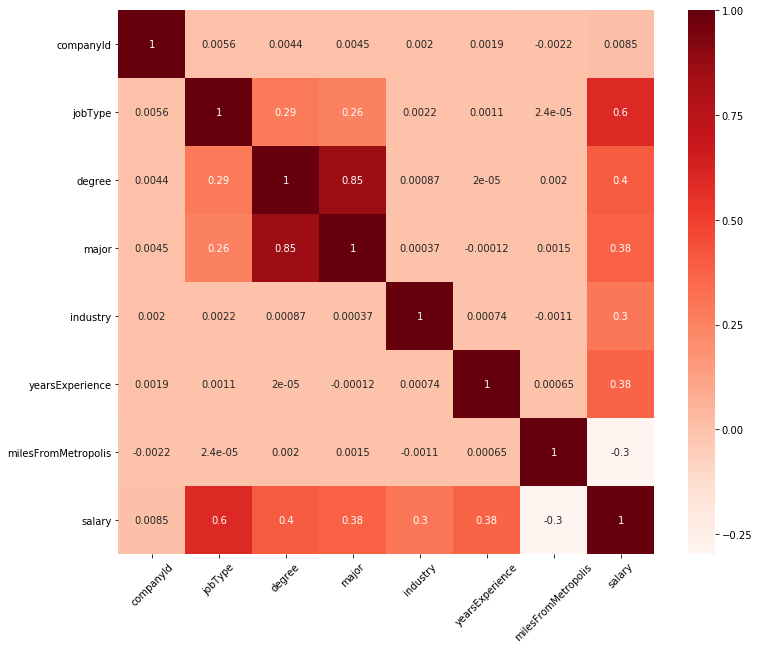

In [42]:
fig = plt.figure(figsize=(12,10))
features = ['companyId','jobType','degree','major','industry','yearsExperience','milesFromMetropolis']
sns.heatmap(train_dt[features + ['salary']].corr(),cmap="Reds",annot=True)
plt.xticks(rotation = 45)
plt.show()

Degree and major are highly correlated

# 3. Baseline Models

Creating a baseline model for five models and later use hyperparameter to find better results

In [43]:
def one_hot_encode_feature_df(df,cat_vars=None,num_vars=None):
    ''''performs one-hot encoding on all categorical variables and combines result with continuous variables'''
    cat_df = pd.get_dummies(df[cat_vars])
    num_df = df[num_vars].apply(pd.to_numeric)
    return pd.concat([cat_df,num_df],axis=1)
    
def train_model(model, feature_df,target_df,mean_mse,cv_std):
    neg_mse = cross_val_score(model,feature_df,target_df,cv=5,scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)
    
def print_summary(model,mean_mse,cv_std):
    print('\nModel:\n',model)
    print('Average MSE:\n',mean_mse[model])
    print('Standard deviation during CV:\n',cv_std[model])

def save_results(model,mean_mse,predictions):
    with open('model.txt','w') as file:
        file.write(str(model))
    np.savetxt('predictions.csv',predictions,delimiter=',')
    
if __name__ =='__main__':
    #define variables
    categorical_vars = ['jobType','degree','major','industry']
    numeric_vars = ['yearsExperience','milesFromMetropolis']
    target_var= 'salary'
    
    #encode categorical data and get final feature dfs
    feature_df = one_hot_encode_feature_df(train_dt,cat_vars=categorical_vars,num_vars=numeric_vars)
    test_df = one_hot_encode_feature_df(test_features,cat_vars=categorical_vars,num_vars=numeric_vars)
    
    #get target df
    target_df = train_dt['salary']

    #intialize model list and dict
    models = []
    mean_mse = {}
    cv_std = {}
    res = {}
    
    #create model
    lr = LinearRegression()
    ls = Lasso()
    rg = Ridge()
    rf = RandomForestRegressor()
    gbm = GradientBoostingRegressor()
    models.extend([lr,ls,rg,rf,gbm])
    
    # Cross validating model and using mse as evaluation metric
    print('Beginning cross validation')
    for model in models:
        train_model(model,feature_df,target_df,mean_mse,cv_std)
        print_summary(model,mean_mse,cv_std)    

Beginning cross validation

Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Average MSE:
 399.13999376003324
Standard deviation during CV:
 1.8686378559604964

Model:
 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Average MSE:
 399.15888370498936
Standard deviation during CV:
 1.8833410246192428

Model:
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Average MSE:
 399.1399937599274
Standard deviation during CV:
 1.8686378787134141


C:\Users\ssghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ssghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ssghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ssghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ssghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F


Model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Average MSE:
 465.93339386026565
Standard deviation during CV:
 1.7673005269350293

Model:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0,

Gradient boosting model has least Average MSE with default settings

# 4. Hypertuning baseline models (GridSearch)

1. Ridge regression

In [44]:
alphas = [1e-1,1e1,1e2,1e3,1e4,1e5]
grid = GridSearchCV(estimator = Ridge(),param_grid=dict(alpha=alphas),cv=5,scoring='neg_mean_squared_error')
grid.fit(feature_df,target_df)
print(grid.best_estimator_)
print(grid.best_score_)

Ridge(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
-399.13999367614787


2. Lasso

In [45]:
alphas = [1e-1,1e1,1e2,1e3,1e4,1e5]
grid = GridSearchCV(estimator = Lasso(),param_grid=dict(alpha=alphas),cv=5,scoring='neg_mean_squared_error')
grid.fit(feature_df,target_df)
print(grid.best_estimator_)
print(grid.best_score_)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
-399.1401803906773


3. Random Forest Regressor
After checking with multiple parameters, below is the last best resulted gridsearch. Started  numbers like 1,2 or 5 for parameters and then checked score for improvment. If improved then moved forward with numbers and stopped when the improvement was very less and time consumption was very high.

In [46]:
n_estimators = [100,150]
max_depths = [25,50]
min_samples_splits = [50,100]

grid = GridSearchCV(estimator = RandomForestRegressor(),param_grid=dict(n_estimators=n_estimators,max_depth=max_depths,
                                                                        min_samples_split=min_samples_splits),cv=5,scoring='neg_mean_squared_error')
grid.fit(feature_df,target_df)
print(grid.best_estimator_)
print(grid.best_score_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
-365.0225958340167


4. Gradient Boosting Regressor

In [47]:
gbr = GradientBoostingRegressor(n_estimators=100,max_depth=6)
neg_mse = cross_val_score(gbr,feature_df,target_df,cv=2,scoring='neg_mean_squared_error')
print(neg_mse.mean())

-358.30427419483135


The best model so far is the Gradient Boosting Regressor with mean squared error of 358.3

# 5. Predictions

Using full dataset for prediction on the model

In [48]:
final_model = GradientBoostingRegressor(n_estimators=100,max_depth=6,random_state=1)
final_model.fit(feature_df,target_df)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
test_features = test_features[['jobType','degree','major','industry','yearsExperience','milesFromMetropolis']]

In [50]:
predictions = final_model.predict(test_features)

In [51]:
def save_results(model, predictions):
    '''saves model, model summary, feature importances, and predictions'''
    with open('model.txt', 'w') as file:
        file.write(str(model))
    np.savetxt('predictions.csv', predictions, delimiter=',')

In [52]:
save_results(final_model,predictions)

# 6. Summary

Applying gradient boosting regressor to the features gave the most accurate predictions with the least mean squared error. The result was a mean squared error of 358.
This model can be used as a guide when determining salaries since it shows reasonable predictions when given information on years of experience, miles from metropolis, job type, industry, and college degree and major.